# <font color='blue'>Boston House-Price Dataset</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## 1 - Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Boston House-Price Dataset contém informações coletadas pelo Serviço de Censo dos EUA sobre moradias na área de Massachusetts Mass. Este conjunto de dados é amplamente utilizado por iniciantes em Machine Learning. O dataset é pequeno, com apenas 506 registros. 

O objetivo é prever os preços de casas em Boston a partir das informações fornecidas pelo conjunto de dados. Por essa razão, estamos diante de um problema de regressão. <br>
    
Descrição das variáveis:<br>
- **crim**: é a taxa de criminalidade per capita na área do imóvel;<br>
- **zn**: é a proporção de terrenos residenciais divididos por lotes acima de 25.000 pés quadrados;<br>
- **indus**: é a proporção de acres não comerciais na área do imóvel;<br>
- **chas**: se a casa limita ou não o Rio Charles (1 se o trecho limita o rio; 0 caso contrário);<br>
- **nox**: é a concentração de óxidos nítricos (partes por 10 milhões);<br>
- **rm**: é o número médio de quartos por habitação;<br>
- **age**: é a proporção de unidades ocupadas pelos proprietários construídas antes de 1940;<br>
- **dis**: é a distância ponderada de cinco centros de trabalho em Boston;<br>
- **rad**: é o índice de acessibilidade às rodovias radiais;<br>
- **tax**: é a taxa de imposto sobre a propriedade em US 10.000;<br>
- **ptratio**: é a proporção aluno-professor na área do imóvel;<br>
- **bk**: é um cálculo referente a esta equação 1000 (Bk - 0,63) ^ 2;<br>
- **lstat**: é a porcentagem da população de baixa renda e;<br>
- **medv (variável alvo)**: é a mediana do valor das casas ocupadas pelos proprietários em US 1.000.<br>
    
Endereço do conjunto de dados: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input<br>


</details>

## 2 - Coletando os dados

#### 2.1 - Importando as bibliotecas

In [2]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np

# Cálculos matemáticos
import math

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Imputação de valores nulos
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em números
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Seleção de variáveis
from sklearn.feature_selection import RFE, SelectKBest

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Buscar os melhores parâmetros que serão utilizados nos modelos preditivos
from sklearn.model_selection import RandomizedSearchCV

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Métricas de avaliação dos modelos preditivos
from sklearn.metrics import r2_score, mean_absolute_error

# Carregar e salvar objetos Python em arquivos no disco
import pickle

# Esse módulo ignara os avisos
import warnings
warnings.filterwarnings("ignore")

#### 2.2 - Carregando os dados

In [3]:
# Coletando os dados 
colunas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BK', 'LSTAT', 'MEDV']
df = pd.read_csv('Dados/Boston-Housing/housing.csv', sep=r"\s+", names=colunas)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
# Separando a variável alvo
variavelAlvo = "MEDV"

## 3 - Reservar linhas para validar o modelo

In [6]:
# Criando uma amostra do conjuto de dados
# O parâmetro "n" define a quantidade de linhas da amostra
dfValidacao = df.sample(n=2, random_state=1)
dfValidacao

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.9,7.53,28.2
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.9,7.18,23.9


In [7]:
# Excluindo do DataFrame original as linhas que serão utilizadas para validar o modelo 
for k in dfValidacao.index:
    df.drop([k], inplace = True)

# É importante reiniciar os índices após a exclusão de linhas
df.reset_index(inplace = True)
df.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# Excluindo coluna
df.drop(["index"], axis=1, inplace = True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 4 - Explorando os dados

#### 4.1 - Informações sobre o dataset

In [9]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     504 non-null    float64
 1   ZN       504 non-null    float64
 2   INDUS    504 non-null    float64
 3   CHAS     504 non-null    int64  
 4   NOX      504 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      504 non-null    float64
 7   DIS      504 non-null    float64
 8   RAD      504 non-null    int64  
 9   TAX      504 non-null    float64
 10  PTRATIO  504 non-null    float64
 11  BK       504 non-null    float64
 12  LSTAT    504 non-null    float64
 13  MEDV     504 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.2 KB


In [10]:
# Sumário estatístico
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,3.627715,11.234127,11.169147,0.069444,0.554999,6.282698,68.595635,3.792414,9.563492,408.682540,18.457341,356.514405,12.674087,22.518849
std,8.615666,23.267285,6.854447,0.254461,0.116006,0.703321,28.199431,2.107945,8.721442,168.658355,2.168908,91.440872,7.147402,9.211693
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.449000,5.884750,44.850000,2.097050,4.000000,279.000000,17.375000,375.300000,6.927500,16.950000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.205000,77.700000,3.207450,5.000000,330.000000,19.100000,391.385000,11.395000,21.200000
75%,3.681942,12.500000,18.100000,0.000000,0.624000,6.618250,94.100000,5.141475,24.000000,666.000000,20.200000,396.210000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### 4.2 Tratando valores nulos

In [11]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BK         0
LSTAT      0
MEDV       0
dtype: int64

#### 4.3 - Tratando dados duplicados

In [12]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira, é igual a outra
df.duplicated().sum()

0

In [ ]:
# Excluindo as linhas duplicadas mantendo a primeira ocorrência da linha
df.drop_duplicates(ignore_index=True, inplace = True)

#### 4.4 - Tratando valores únicos

In [13]:
# Verificando a quantidade de valores únicos
# Variáveis quantitativas com muitos valores únicos podem prejudicar o aprendizado de máquina
df.nunique()

CRIM       502
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         444
AGE        354
DIS        410
RAD          9
TAX         66
PTRATIO     46
BK         357
LSTAT      453
MEDV       228
dtype: int64

#### 4.5 - Análise descritiva dos dados

##### 4.5.1 - Parâmetros dos gráficos

In [14]:
# Define a paleta de cores
sns.color_palette("pastel")

# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

##### 4.5.2 - Funções para desenhar os gráficos

###### a) Histograma

In [15]:
# Função para plotar um histograma
def desenhaHistograma(coluna, variavelAnalisada):

    # Calculando a quantidade de classes da variável analisada
    n = coluna.count()
    k = round(1+3.3*math.log10(n))
   
    # Calculando o intervalo de cada classe
    frequencias, intervalos = np.histogram(coluna, bins = k)

    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.histplot(coluna, bins=k, kde=True)
    ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xlabel(variavelAnalisada, fontsize = 12)
    ax.set_ylabel("Frequência", fontsize = 12)
    ax.set_xticks(intervalos) 
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### b) Boxplot

In [16]:
# Função para plotar um Boxplot
def desenhaBoxplot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(data=coluna)
    ax.set_title("Boxplot da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xticklabels([variavelAnalisada]) # exibe o nome da variável
    larguraBox = 0.63
    i=0

    # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
    q1, q2, q3 = coluna.quantile(0.25), coluna.quantile(0.5), coluna.quantile(0.75)
    
    # Lista com os quartis
    quartis = [q1, q2, q3]

    # Exibe os quartis no gráfico
    for q in quartis:
        x = i-larguraBox/2
        y = q
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x-0.1, y), textcoords='data',
                    va='center', ha='right')
    plt.show()

###### c) Scatter Plot

In [17]:
# Função para plotar um Scatter Plot
def desenhaScatterPlot(colunaX, colunaY, variavelAnalisadaX, variavelAnalisadaY):
    
    # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.scatterplot(x=colunaX, y=colunaY) 
    ax.set_title("Relação da variável " + variavelAnalisadaX + " com a variável " + variavelAnalisadaY, fontsize = 16)
    ax.set_xlabel(variavelAnalisadaX, fontsize = 12)
    ax.set_ylabel(variavelAnalisadaY, fontsize = 12)
    plt.show()

###### d) CountPlot

In [18]:
# Função para plotar um gráfico Countplot
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.countplot(x=coluna, palette=("Pastel1"),  order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### e) Gráfico de Pizza

In [19]:
# Função para plotar um gráfico de pizza
def desenhaPizza(coluna, variavelAnalisada):
    
    # Calculando o percentual
    percentuais = round((coluna.value_counts()/coluna.value_counts().sum())*100, 2)

    # Nome das categorias
    nomeDasCategorias = coluna.value_counts().index

    # Desenhando o gráfico
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.pie(percentuais, labels=nomeDasCategorias, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title("Percentuais da variável " + variavelAnalisada, fontsize = 16)
    ax.legend(title=variavelAnalisada,loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
    plt.show()

##### 4.5.3 Análise descritiva das variáveis quantitativas

Resumo estatístico da variável CRIM
 count    504.000000
mean       3.627715
std        8.615666
min        0.006320
25%        0.082382
50%        0.260420
75%        3.681942
max       88.976200
Name: CRIM, dtype: float64


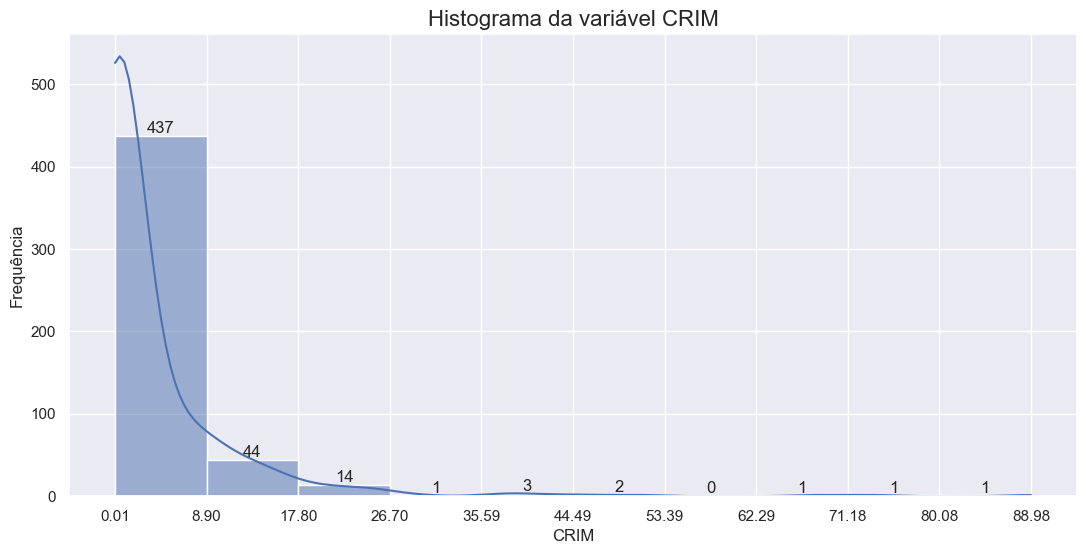

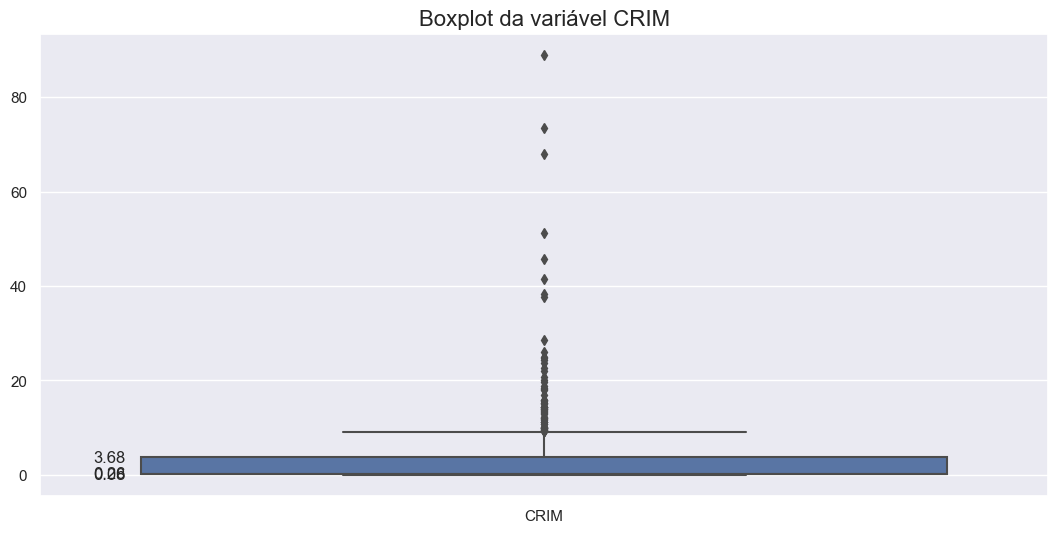

Resumo estatístico da variável ZN
 count    504.000000
mean      11.234127
std       23.267285
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64


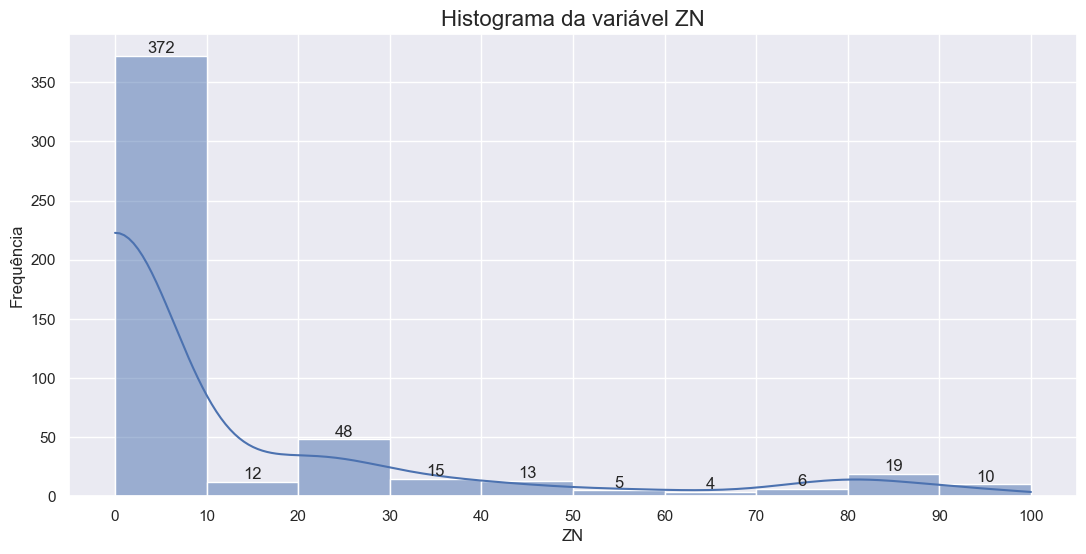

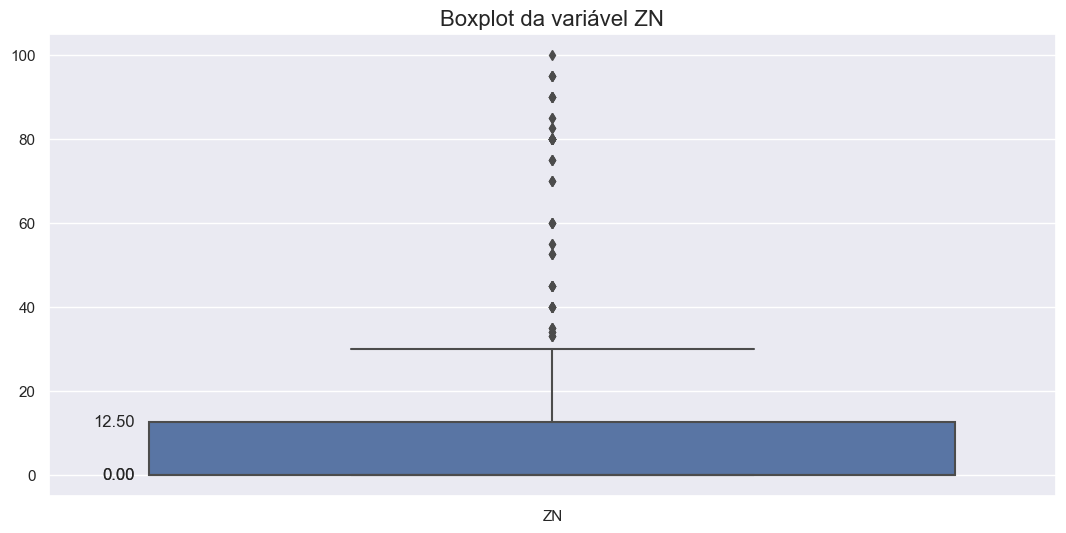

Resumo estatístico da variável INDUS
 count    504.000000
mean      11.169147
std        6.854447
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64


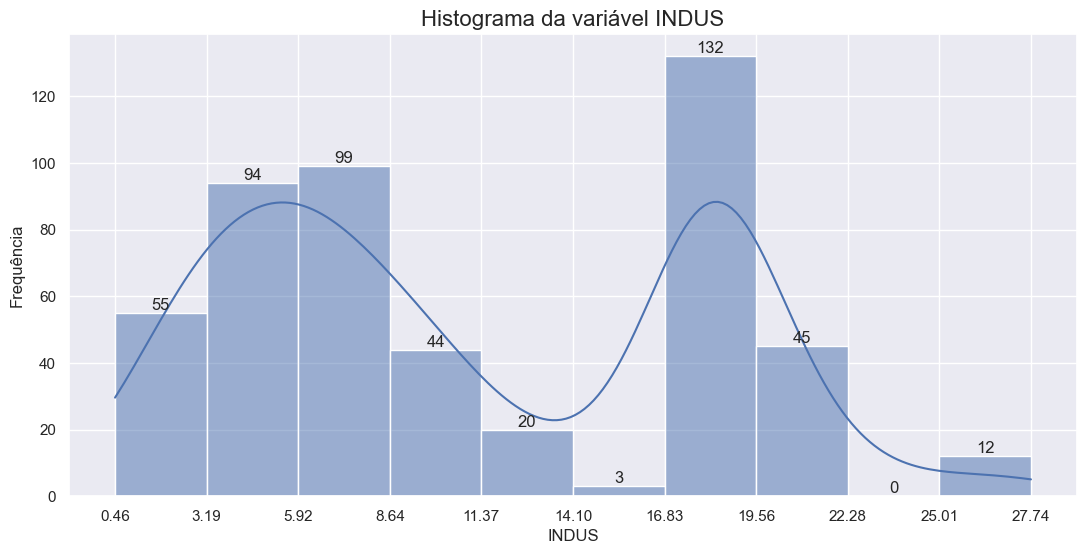

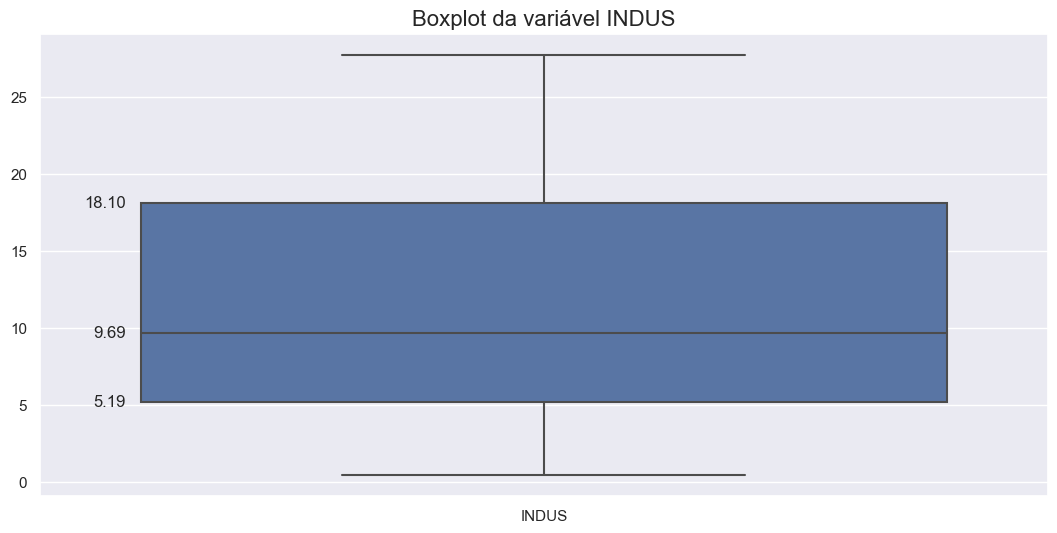

Resumo estatístico da variável CHAS
 count    504.000000
mean       0.069444
std        0.254461
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64


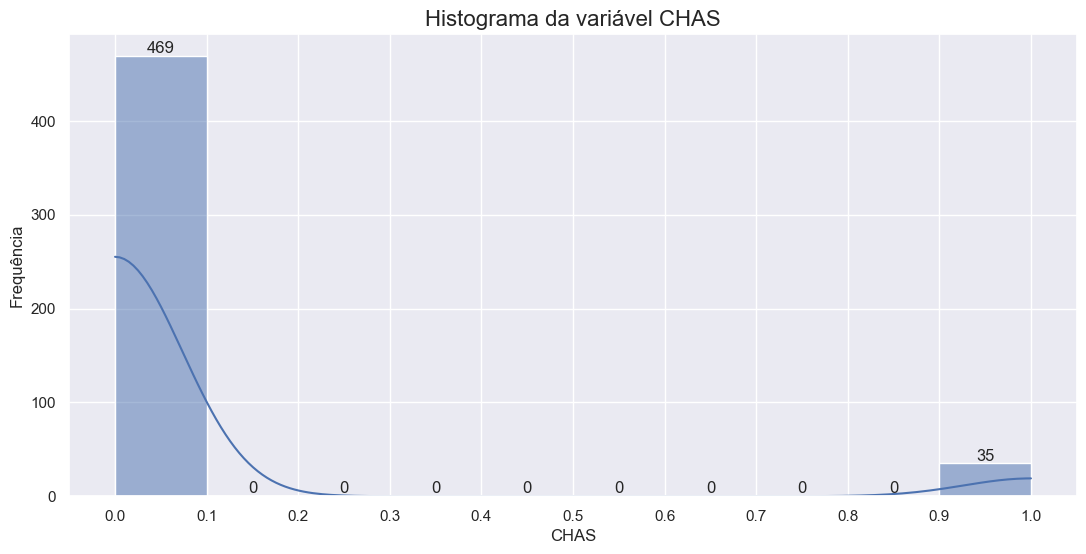

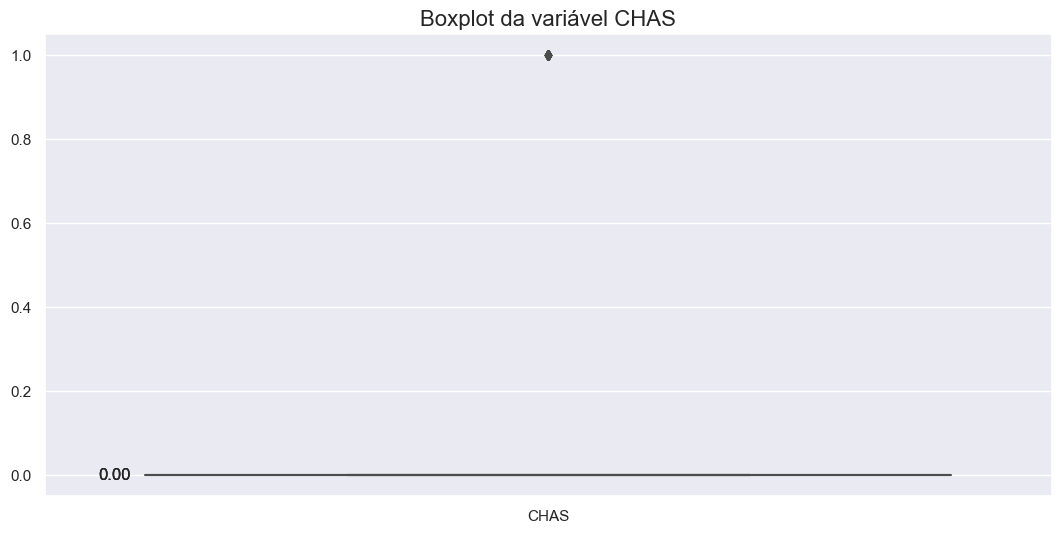

Resumo estatístico da variável NOX
 count    504.000000
mean       0.554999
std        0.116006
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64


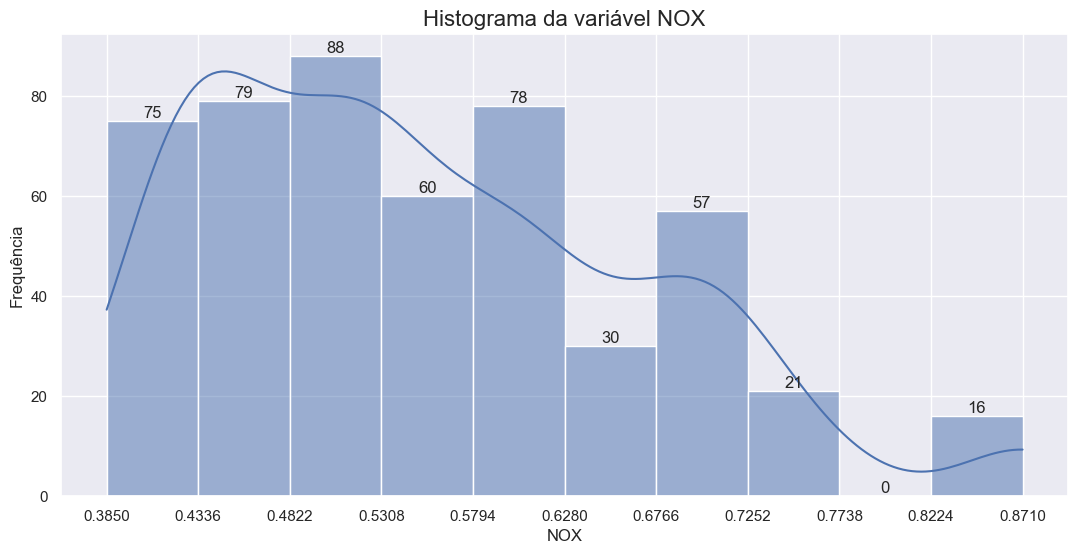

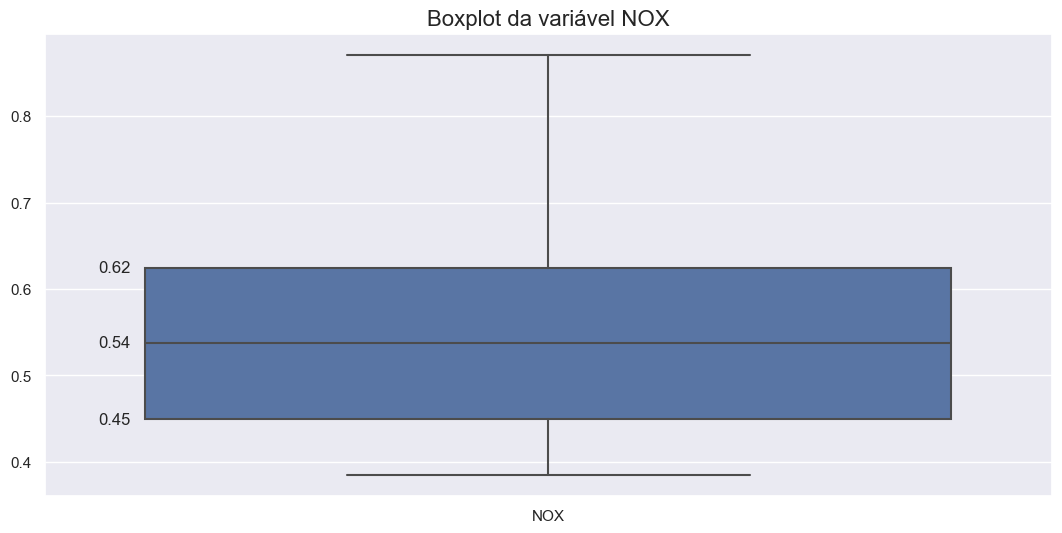

Resumo estatístico da variável RM
 count    504.000000
mean       6.282698
std        0.703321
min        3.561000
25%        5.884750
50%        6.205000
75%        6.618250
max        8.780000
Name: RM, dtype: float64


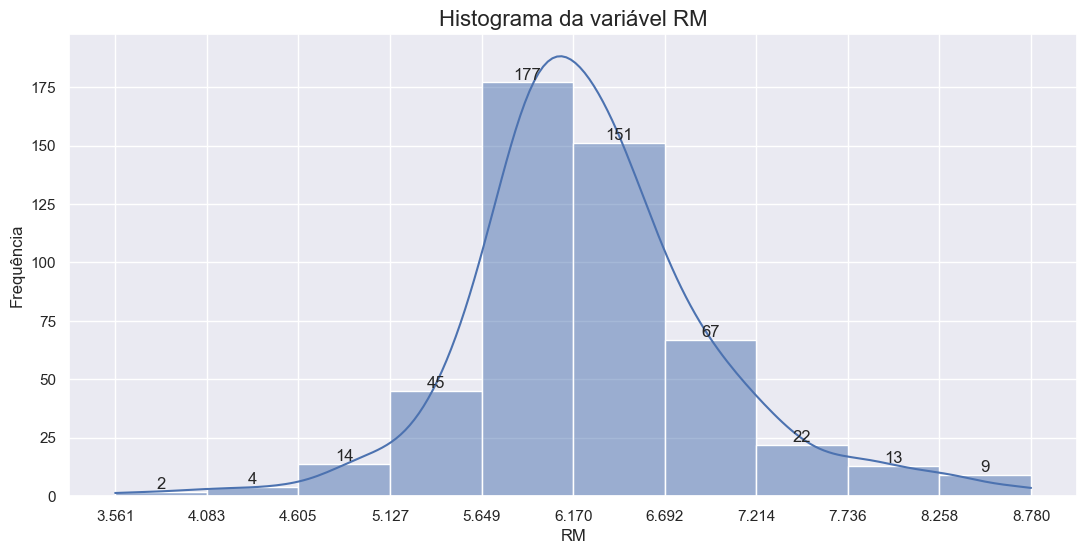

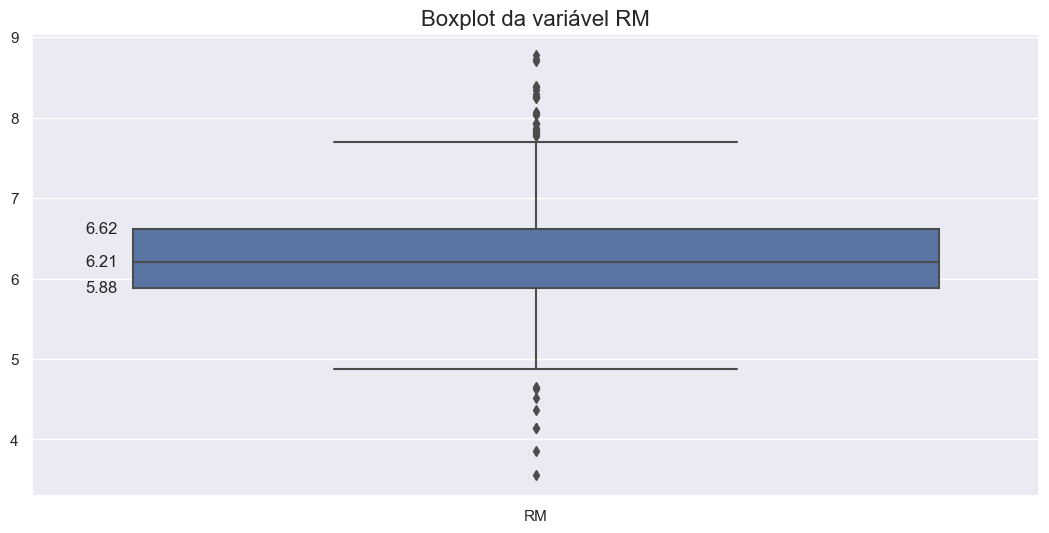

Resumo estatístico da variável AGE
 count    504.000000
mean      68.595635
std       28.199431
min        2.900000
25%       44.850000
50%       77.700000
75%       94.100000
max      100.000000
Name: AGE, dtype: float64


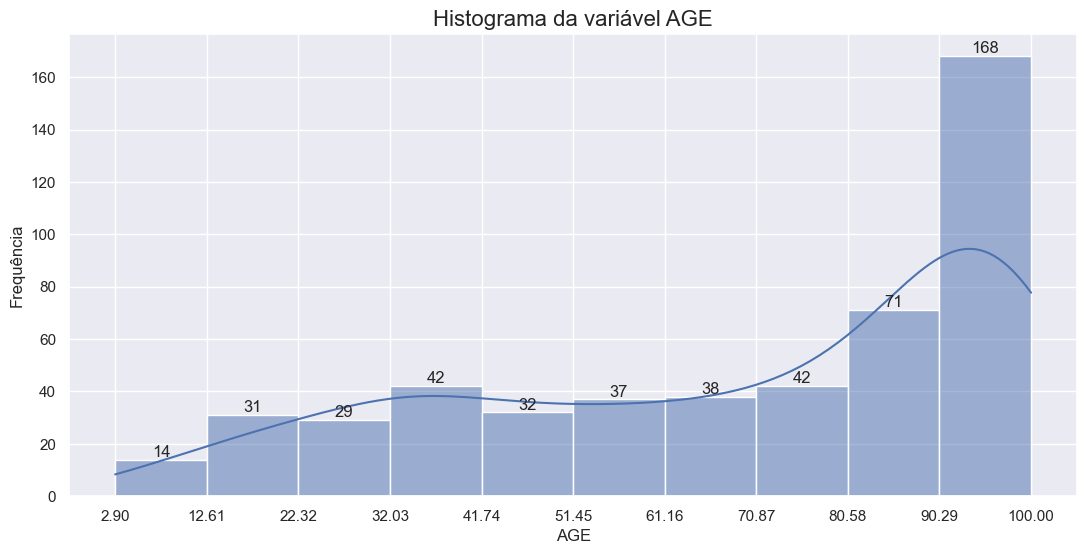

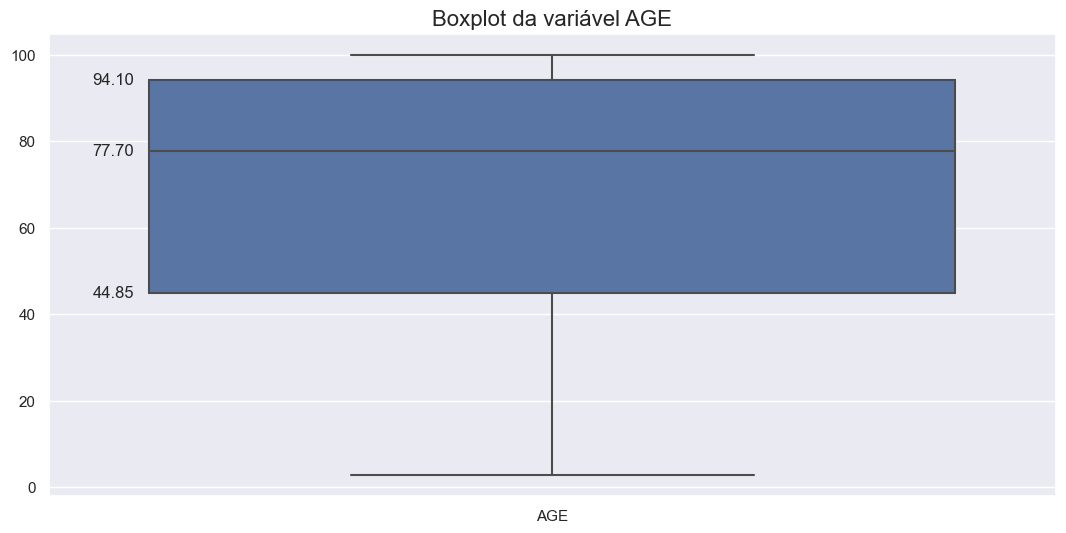

Resumo estatístico da variável DIS
 count    504.000000
mean       3.792414
std        2.107945
min        1.129600
25%        2.097050
50%        3.207450
75%        5.141475
max       12.126500
Name: DIS, dtype: float64


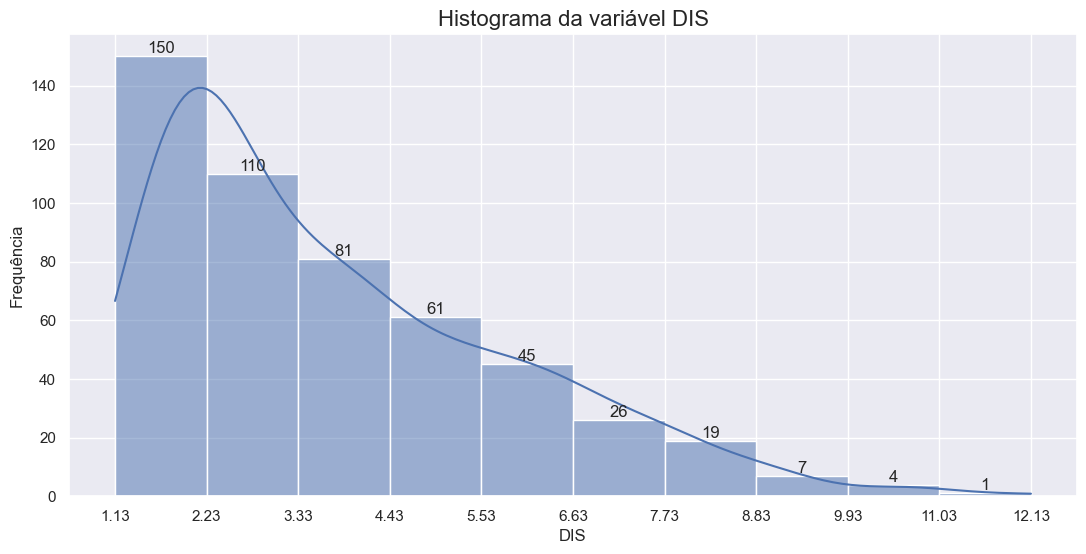

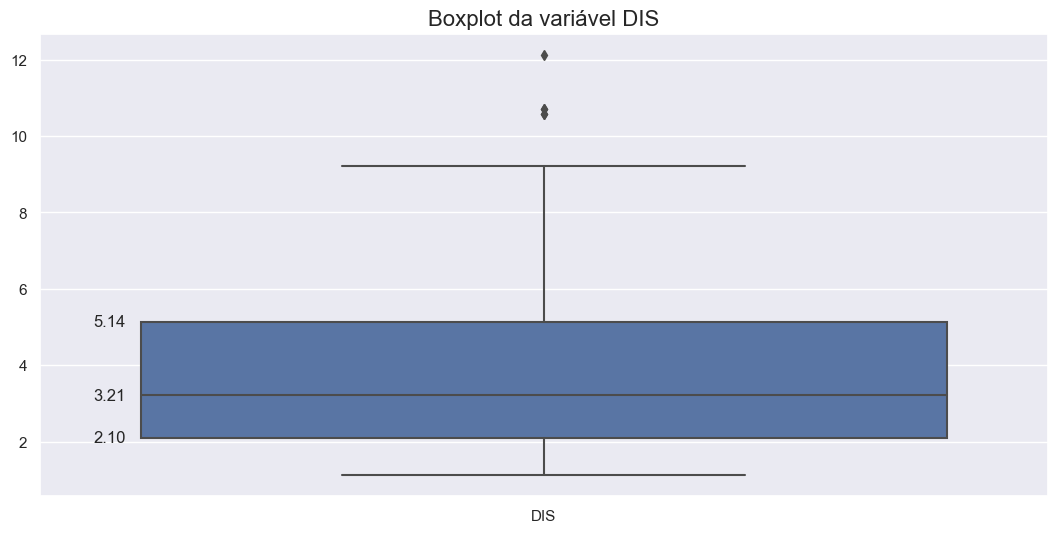

Resumo estatístico da variável RAD
 count    504.000000
mean       9.563492
std        8.721442
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64


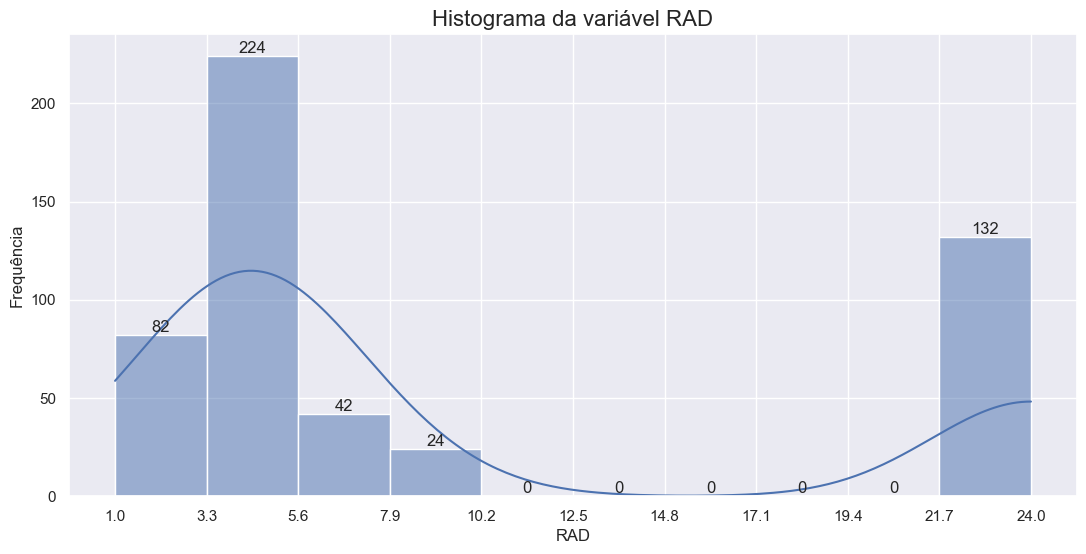

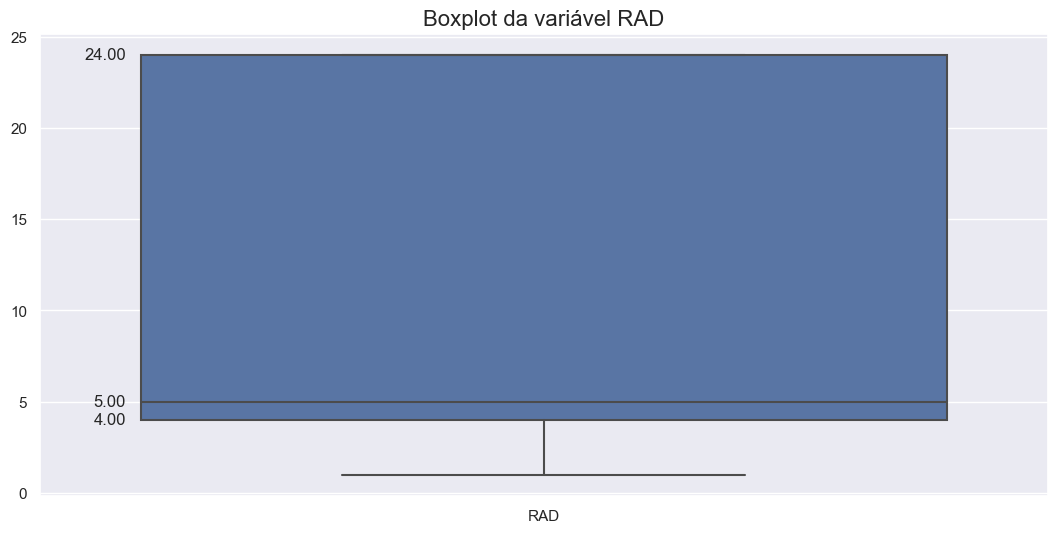

Resumo estatístico da variável TAX
 count    504.000000
mean     408.682540
std      168.658355
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64


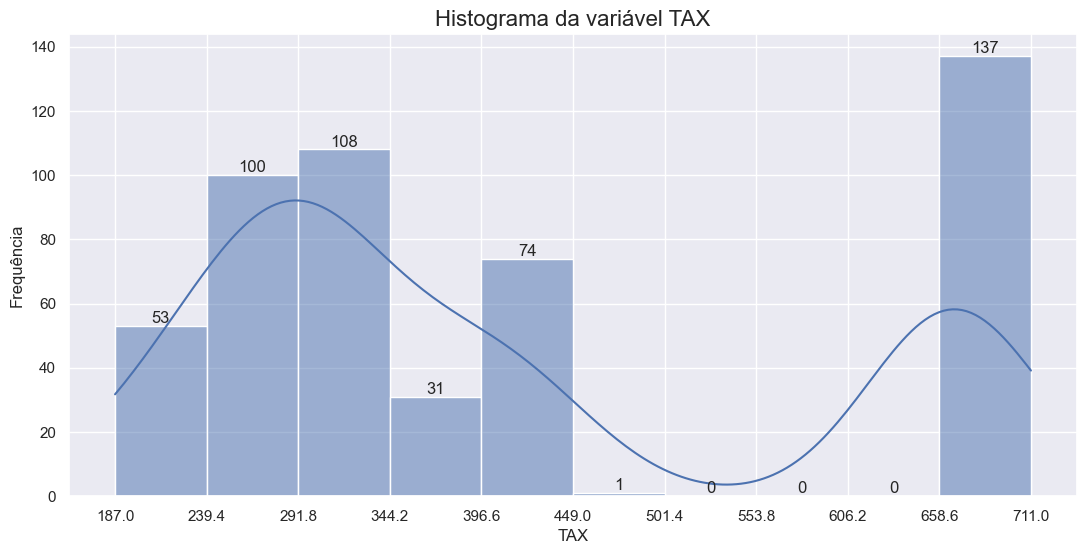

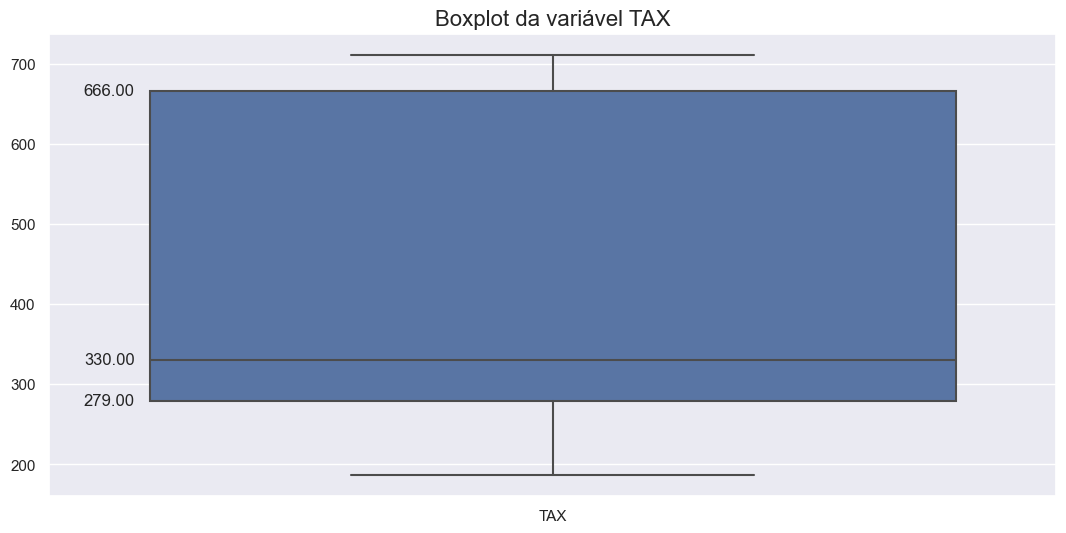

Resumo estatístico da variável PTRATIO
 count    504.000000
mean      18.457341
std        2.168908
min       12.600000
25%       17.375000
50%       19.100000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


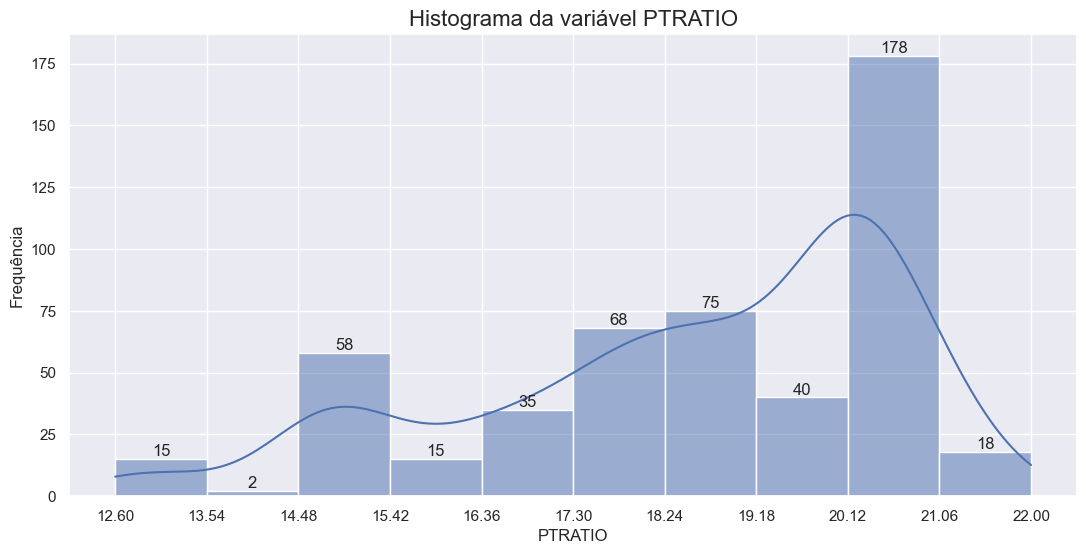

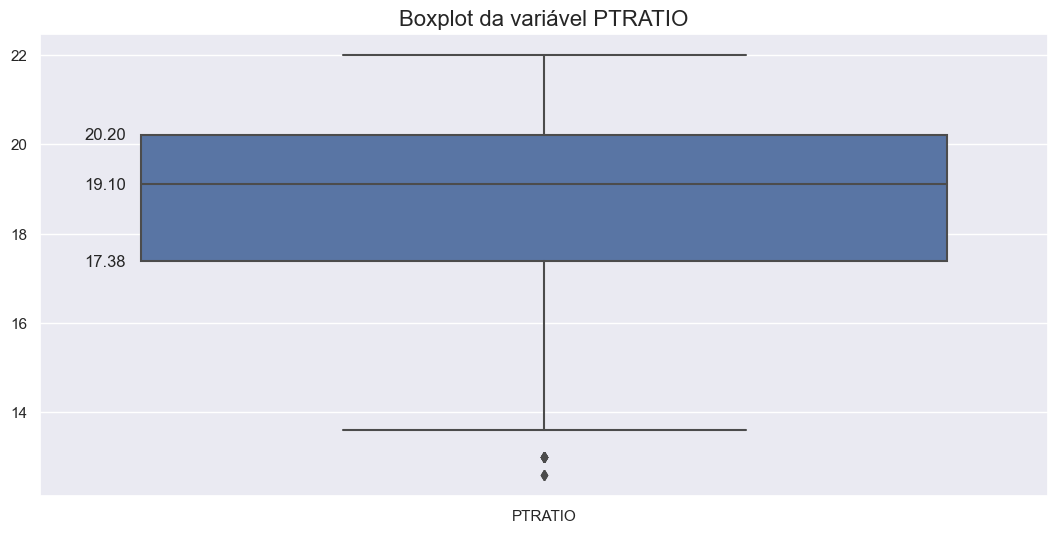

Resumo estatístico da variável BK
 count    504.000000
mean     356.514405
std       91.440872
min        0.320000
25%      375.300000
50%      391.385000
75%      396.210000
max      396.900000
Name: BK, dtype: float64


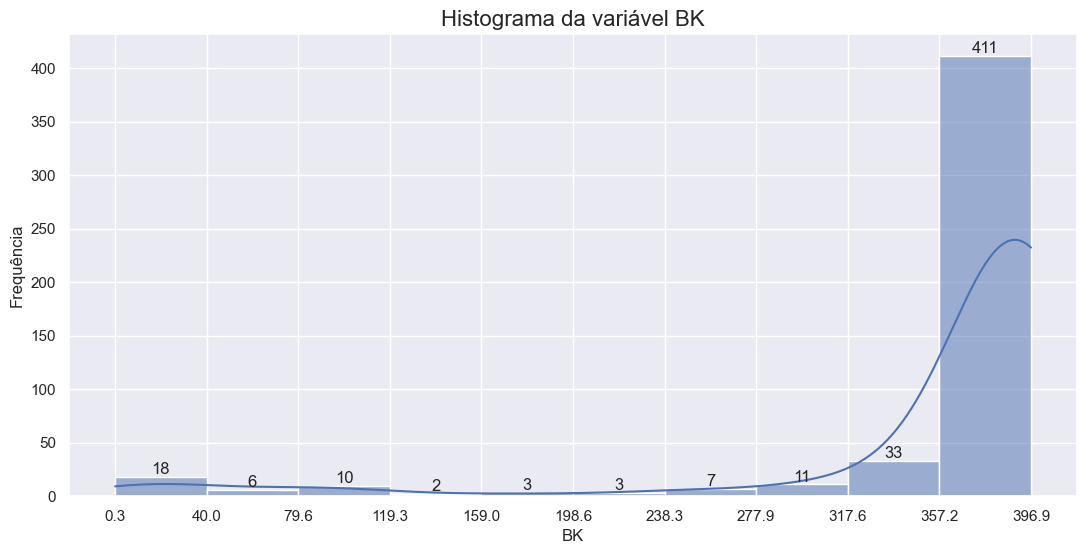

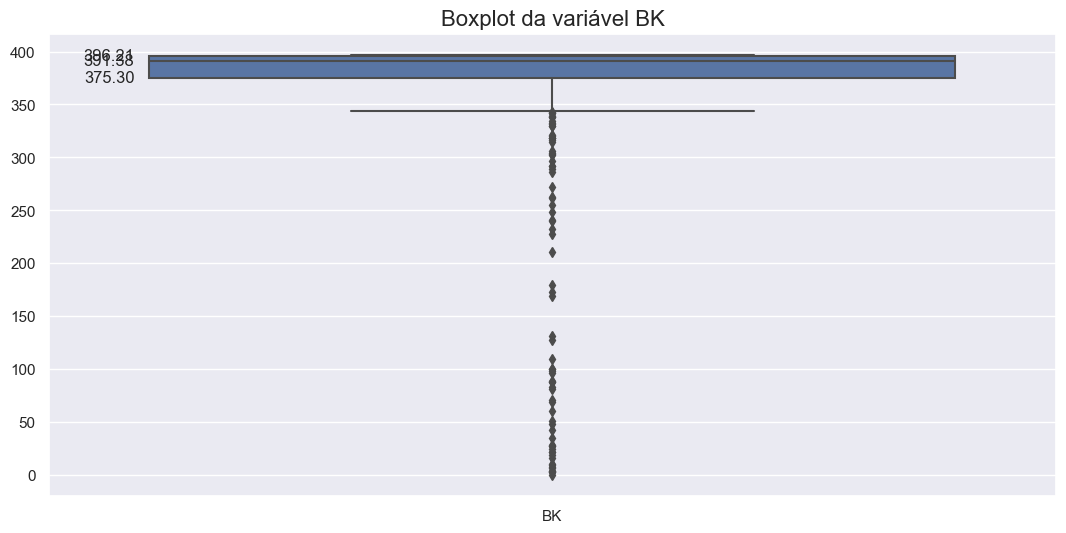

Resumo estatístico da variável LSTAT
 count    504.000000
mean      12.674087
std        7.147402
min        1.730000
25%        6.927500
50%       11.395000
75%       16.992500
max       37.970000
Name: LSTAT, dtype: float64


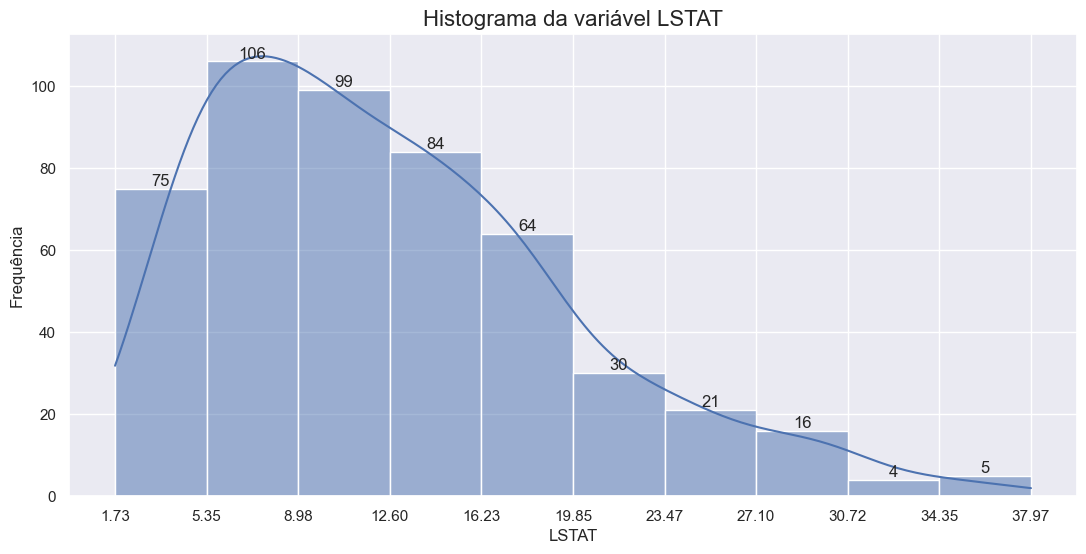

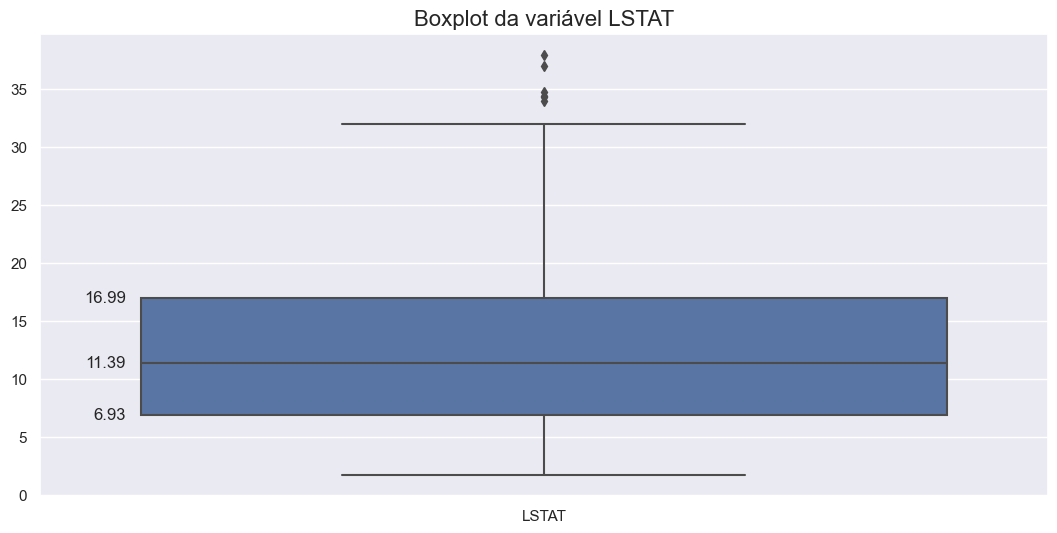

In [20]:
# Loop que percorre todas as colunas
# A notação de slicing [0:13] é para não incluir a variável alvo
for k in df.columns[0:13]:
    # Verifica se a coluna não possui valores do tipo texto
    if df[k].dtypes != object:
        
        # Sumário estatístico
        print("Resumo estatístico da variável " + k + "\n", df[k].describe())
        
        # Histograma
        desenhaHistograma(df[k], k)
        
        # Boxplot
        desenhaBoxplot(df[k], k)

##### 4.5.4 Análise descritiva das variáveis Categóricas

In [ ]:
# Loop que percorre todas as colunas
for k in df.columns[0:13]:
    # Verifica se a coluna possui valores do tipo texto
    if df[k].dtypes == object:
        
        # Frequência absoluta 
        desenhaCountPlot(df[k], k)
        
        # Percentuais
        desenhaPizza(df[k], k)       

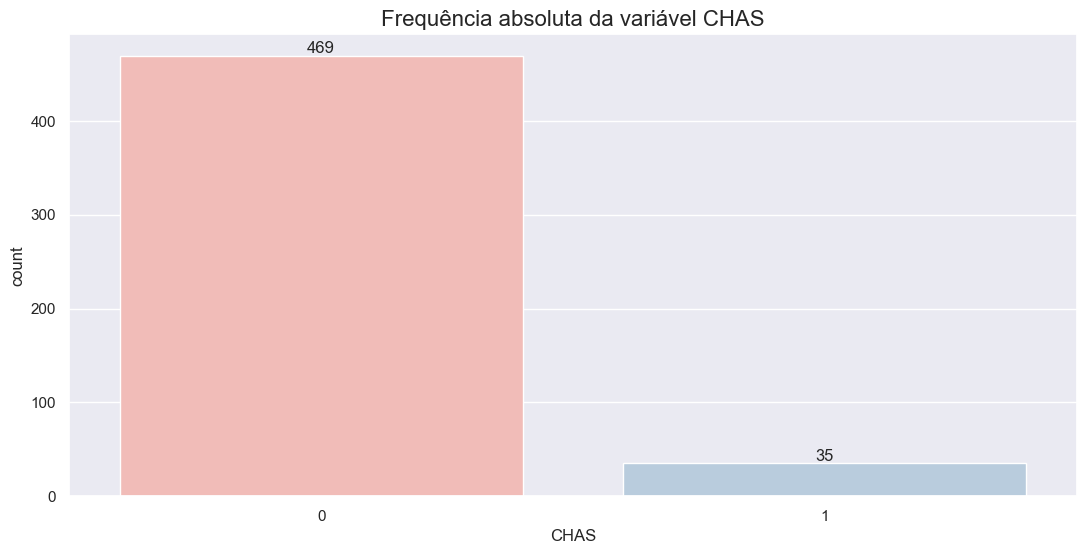

In [21]:
# CountPlot da variável CHAS
desenhaCountPlot(df.CHAS, "CHAS")

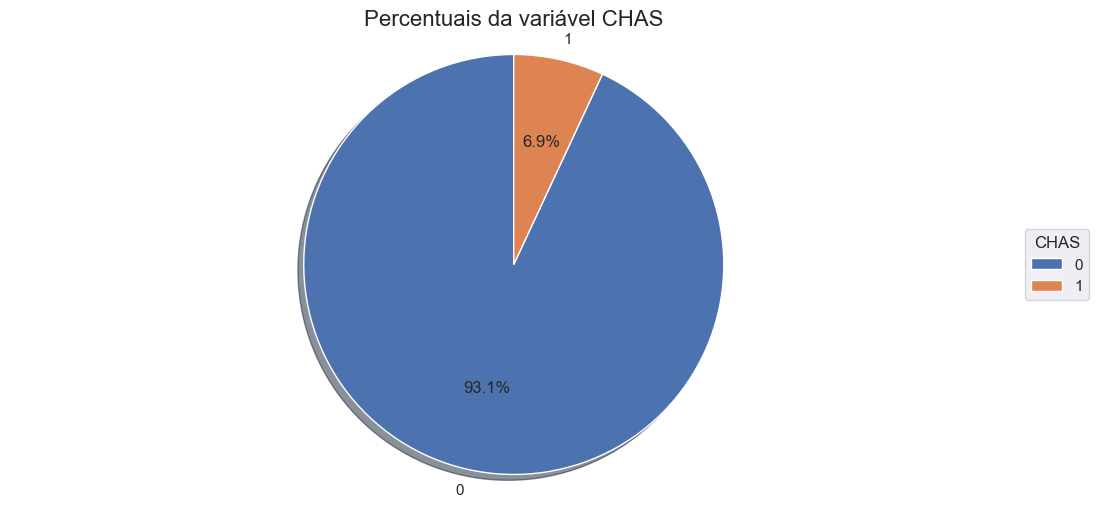

In [22]:
# Gráfico de Pizza da variável CHAS
desenhaPizza(df.CHAS, "CHAS")

##### 4.5.5 Análise descritiva da variável alvo

In [23]:
# Sumário estatístico
pd.DataFrame(df[variavelAlvo].describe())

,MEDV
count,504.000000
mean,22.518849
std,9.211693
min,5.000000
25%,16.950000
50%,21.200000
75%,25.000000
max,50.000000


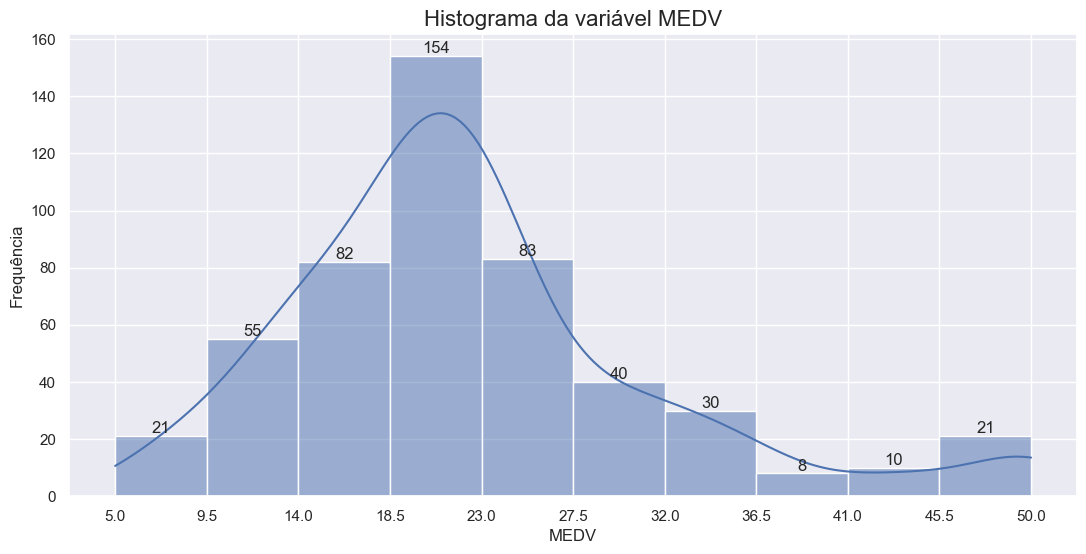

In [24]:
# Frequência absoluta 
desenhaHistograma(df[variavelAlvo], variavelAlvo)

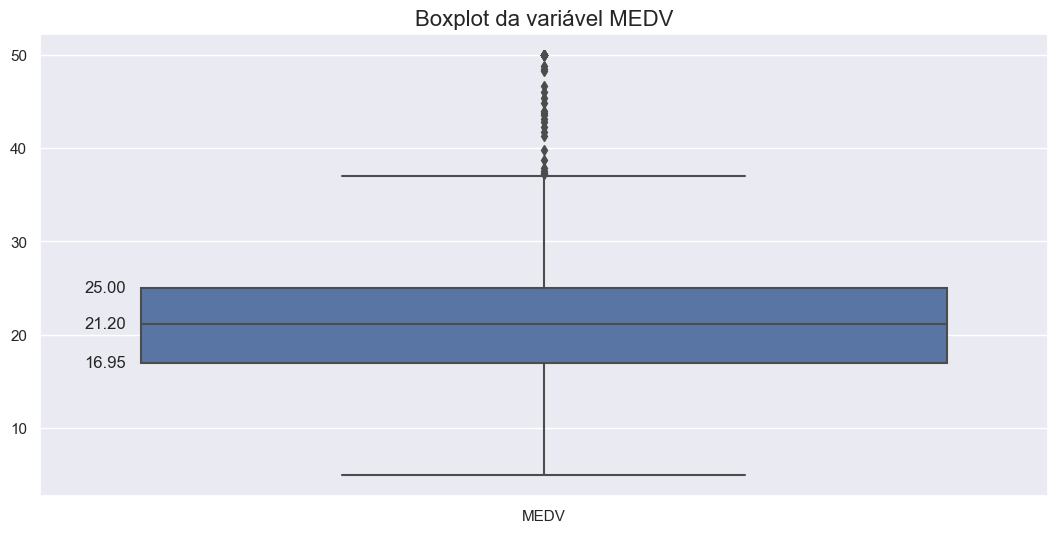

In [25]:
# Percentuais
desenhaBoxplot(df[variavelAlvo], variavelAlvo)

##### 4.5.6 - Correlação entre as variáveis

###### 4.5.6.1 - Matriz de correlação 

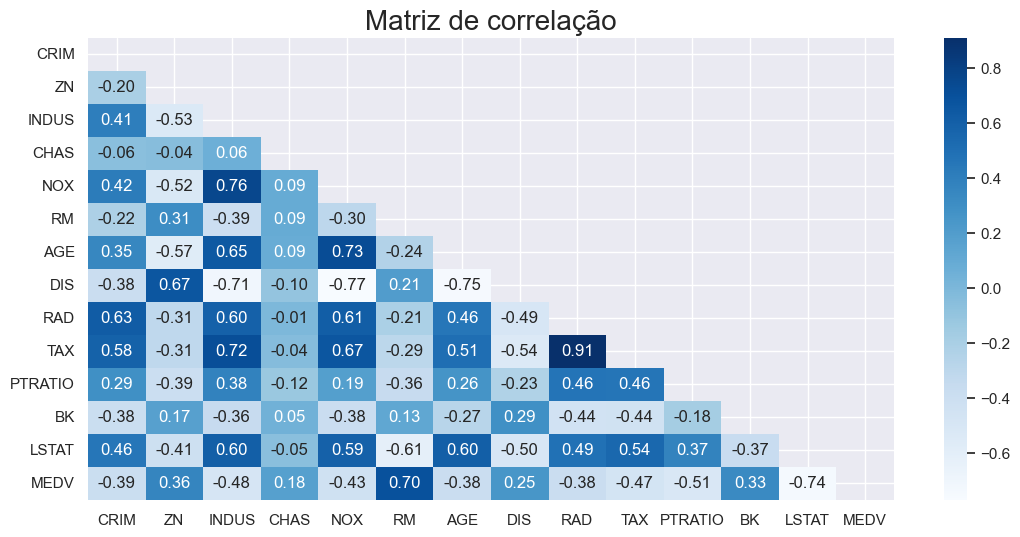

In [26]:
# Calculando a correlação 
correlacao = df.corr()

# Criando uma máscara
mascara = np.zeros_like(correlacao)

# Selecionando a matriz triangular inferior da máscara.
mascara[np.triu_indices_from(mascara)] = True

# Criando o heatmap
fig = plt.subplots(figsize=(13, 6))
sns.heatmap(data = correlacao,
            mask = mascara,
            annot = True,
            fmt = '.2f',
            cmap='Blues',

            )
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

###### 4.5.6.2 - Correlação entre a variável RM e a variável alvo

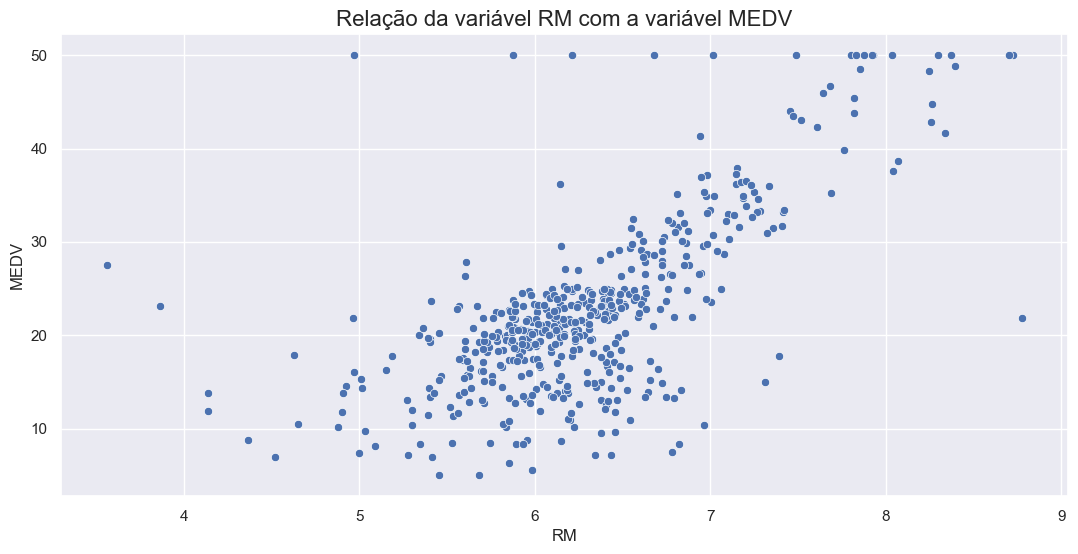

In [27]:
# ScatterPlot
desenhaScatterPlot(df.RM, df.MEDV, "RM","MEDV" )

###### 4.5.6.3 - Correlação entre a variável LSTAT e a variável alvo

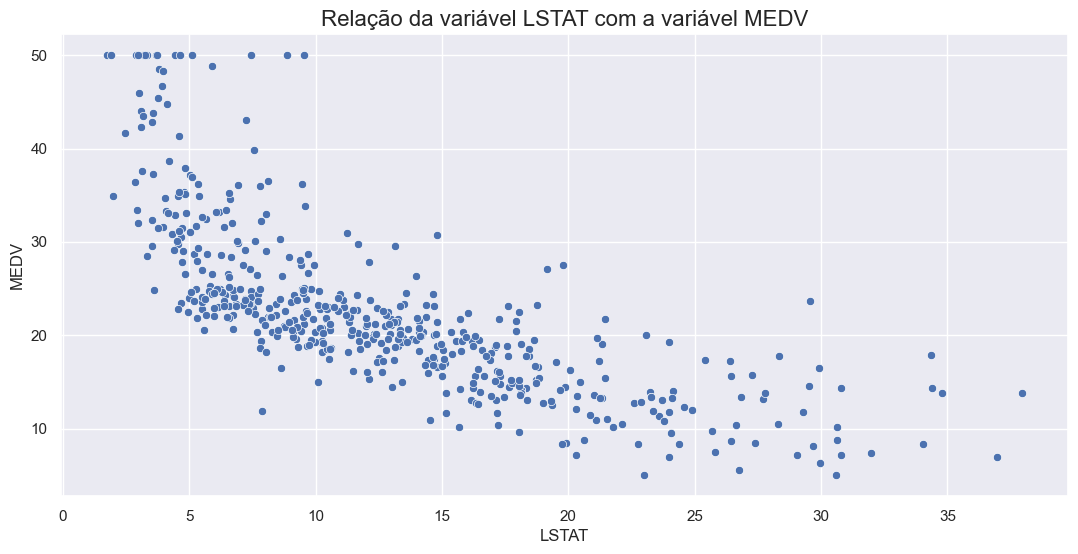

In [28]:
# ScatterPlot
desenhaScatterPlot(df.LSTAT, df.MEDV, "LSTAT","MEDV" )

## 5 - Transformando os dados

In [29]:
# Faz uma cópia do dataframe
df2 = df.copy()

### 5.1 Tratando valores iguais a zero

In [30]:
# Verificando as colunas que possuem valores iguais a zero
# Loop que percorre todas as colunas
# A notação de slicing [0:13] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:13]:
    
    # Verifica se os valores não são do tipo texto
    if df2[k].dtype != object:
        
        # Imprime na tela a quantidade de valores iguais a zero existentes na coluna
        print(k + ":", len(df2[df2[k] == 0]))

CRIM: 0
ZN: 372
INDUS: 0
CHAS: 469
NOX: 0
RM: 0
AGE: 0
DIS: 0
RAD: 0
TAX: 0
PTRATIO: 0
BK: 0
LSTAT: 0


### 5.2 - Identificando e tratando valores outliers

In [ ]:
# Loop que percorre todas as colunas
# A notação de slicing [0:13] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df.columns[0:13]:
    
    # Verifica se os valores da coluna não são do tipo texto
    if df2[k].dtype != object:
       
        # Calculando o zscore da coluna
        zscore = (df2[k] - df2[k].mean()) / df2[k].std()
        
        # Pesquisando valores menores que -3 ou maiores que 3 que são considerados outliers
        outliers = zscore[(zscore < -3) | (zscore > 3)]
        
        # Calculando o limite superior
        limiteSuperior = df2[k].mean() + 3 * df2[k].std()

        # Calculando o limite inferior
        limiteInferior = df2[k].mean() - 3 * df2[k].std()
        
        # Verifica se há outliers na coluna 
        if len(outliers) > 0:
            
            # Calcula a média da coluna, excluindo os valores outliers
            media = df2[k][(df[k] > limiteInferior) & (df2[k] <= limiteSuperior)].mean()
            
            # Cria uma lista vazia para armazenar as linhas com outliers
            linhasComOutlier = []
             
            # Loop que percorre as linhas com outliers
            for j in outliers.index:
                
                # Substitui a célula com valor outlier pela média
                df2[k] = df2[k].replace(df2.iloc[j][k], media)
                
                # Adiciona o índice da linha na lista
                linhasComOutlier.append(j)
                
            print("- Quantidade de valores outliers " + "da variável " + k + " substituídos pela média"  + ":", len(outliers))
            print("- Linha (as) da variável " + k + " que foi (foram) alterada (as):", linhasComOutlier)    

### 5.3 - Convertendo variáveis categóricas em números

#### 5.3.1 Convertendo as variáveis preditoras de texto para número

##### 5.3.2.1 Encoding com o Pandas

In [ ]:
df3 = pd.get_dummies(df2)
df3.head()

In [ ]:
# Visualizando o nome das colunas
df3.columns

In [ ]:
# Organizando o dataframe
valoresVariavelAlvo = df3[variavelAlvo]
df3.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df3[variavelAlvo] = valoresVariavelAlvo
df3.columns

## 6 - Dividindo os dados em treino e teste

ATENÇÃO!! Qual o dataframe será utilizado df2 ou df3 ?

In [31]:
# Fazendo uma cópia do dataframa
dfDados = df2.copy()

In [32]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(dfDados.columns)-1

# A notação de slicing [0:13] é para não incluir a variável alvo
X = dfDados[dfDados.columns[0:13]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [33]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 200
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = XGBRegressor()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

,random_state,R2
101,102,93.96


In [34]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 7 - Seleção de variáveis

### 7.1 - Selecionado as melhores variáveis com o Random Forest Regressor

In [ ]:
# Criando o modelo
randomForestRegressor = RandomForestRegressor(random_state=0)

# Treinando o modelo
randomForestRegressor.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = randomForestRegressor.feature_importances_, index = dfDados.columns[0:13])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Níveis de importância das variáveis - Random Forest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.2 - Selecionado as melhores variáveis com o SelectKBest

In [ ]:
# Cria o objeto SelectKBest
selectkBest = SelectKBest(k = 4)

# Executa a função em (X, y) e obtém as variáveis selecionadas
selectkBestTreinado = selectkBest.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = selectkBestTreinado.scores_, index = dfDados.columns[0:13])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Níveis de importância das variáveis - SelectKBest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.3 - Selecionado as melhores variáveis com Eliminação Recursiva de Atributos RFE 

In [ ]:
# Criando o modelo
extraTreesRegressor = ExtraTreesRegressor(random_state=0)

# Treinando o modelo
extraTreesRegressor.fit(X, y)

# Criando Eliminação Recursiva de Atributos RFE
eliminacaoRecursiva = RFE(extraTreesRegressor)

# Treinando Eliminação Recursiva de Atributos RFE
eliminacaoRecursivaTreinada = eliminacaoRecursiva.fit(X, y)

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
plt.title("Importância das variáveis - RFE", fontsize = 16)
# A notação de slicing [0:13] é para não incluir a variável alvo
plt.bar(dfDados.columns[0:13], eliminacaoRecursivaTreinada.support_)
plt.xticks(rotation=90)
plt.show()

## 8 - Dividindo os dados de treino e teste com as variáveis selecionadas

In [ ]:
# Variáveis selecionadas
variaveisSelecionadas = ["INDUS", "RM", "DIS", "TAX", "PTRATIO", "LSTAT"]

In [ ]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(variaveisSelecionadas)
X = dfDados[variaveisSelecionadas].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [ ]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 100
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = XGBRegressor()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

In [ ]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 9 - Cross Validation
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Cross-validation é uma técnica comumente usada em machine learning para avaliar a capacidade de generalização de um modelo preditivo. Ela envolve a divisão dos dados disponíveis em vários conjuntos de treinamento e vários conjuntos de teste, permitindo que o modelo seja testado em dados independentes para verificar o desempenho e a capacidade de generalização.<br>

O procedimento básico de cross-validation envolve dividir o conjunto de dados em k partes iguais (também conhecidas como "folds") de tamanho aproximadamente igual. Em seguida, o modelo é treinado em k-1 partes desses folds e avaliado no fold restante. Esse processo é repetido k vezes, alternando o fold de teste a cada iteração.

Existem várias formas comuns de cross-validation, sendo a validação cruzada k-fold (k-fold cross-validation) a mais amplamente utilizada. Nessa abordagem, o conjunto de dados é dividido em k partes iguais, e o modelo é treinado e avaliado k vezes, utilizando cada parte como o conjunto de teste uma vez.

Ao final do processo de cross-validation, são obtidas k medidas de desempenho do modelo, uma para cada iteração. Essas medidas podem ser resumidas para fornecer uma estimativa geral do desempenho do modelo, como a média ou a mediana das medidas obtidas.

A utilização do cross-validation ajuda a mitigar o risco de overfitting (sobreajuste) do modelo aos dados de treinamento, fornecendo uma avaliação mais robusta do desempenho em dados não vistos. Isso é especialmente útil quando se tem um conjunto de dados pequeno, pois permite obter uma estimativa mais confiável do desempenho do modelo em geral.

</details>

In [35]:
# Define a quantidade de folds
numeroFolds = 5

# Define a semente para criar os folds
seed = 15

# KFold divide o conjunto de dados em grupos de amostras, chamados folds
kfold = KFold(n_splits = numeroFolds, shuffle=True, random_state = seed)

# Criando o modelo
modelo = XGBRegressor()

# Cross Validation
resultados = cross_val_score(modelo, X, y, cv=kfold, scoring="r2")

print("R2 encontrados:", resultados*100)
print("Média dos R2:", resultados.mean()*100)

R2 encontrados: [84.34144908 90.07335551 88.84104346 90.47646317 90.42458926]
Média dos R2: 88.83138009428055


In [36]:
def calculaCrossValidation(dadosEntrada, dadosSaida):
    # Criando uma lista vazia para armazenar os modelos de Machine Learning
    modelos = []
    
    # Adicionando os modelos a lista
    modelos.append(("Regressão Linear", LinearRegression()))
    modelos.append(("Ridge", Ridge()))
    modelos.append(("KNN", KNeighborsRegressor()))
    modelos.append(("SVM", LinearSVR()))
    modelos.append(("Árvore de Decisão", DecisionTreeRegressor()))
    modelos.append(("Random Forest", RandomForestRegressor()))
    modelos.append(("Extra Tree", ExtraTreesRegressor()))
    modelos.append(("Bagging", BaggingRegressor()))
    modelos.append(("AdaBoost", AdaBoostRegressor()))
    modelos.append(("Voting", VotingRegressor(estimators=[("AD",DecisionTreeRegressor()),("GB", GradientBoostingRegressor()),("RL", LinearRegression())])))
    modelos.append(("Gradient Tree Boosting", GradientBoostingRegressor()))
    modelos.append(("XGBoost", XGBRegressor()))    

    # Criando um Dataframe para armazenar a média de cada um dos algoritmos testados.
    dfMedias   = pd.DataFrame(columns = ['Algoritmo', 'Media'])

    # Define a quantidade de folds
    numeroFolds = 5

    # Define a semente para criar os folds
    seed = 28

    # KFold divide o conjunto de dados em grupos de amostras, chamados folds
    kfold = KFold(n_splits = numeroFolds, shuffle=True, random_state = seed)

    for nome, construtor in modelos:
        # Cross Validation
        resultados = cross_val_score(construtor, dadosEntrada, dadosSaida, cv=kfold, scoring="r2")

        # Calcula a média dos resultados
        media = resultados.mean()*100

        # Define os parâmetros para adicionar a linha no dataframe
        novaLinha = {"Algoritmo": nome,
                     "Media": media}

        # Adicionando uma linha no final do DataFrame
        dfMedias.loc[len(dfMedias.index)] = novaLinha

    # Ordena o dataframe da maior média para a menor    
    dfMedias.sort_values(by=["Media"], ascending=False, inplace=True)
    
    return dfMedias

### 9.1 - Cross Validation com dados originais

In [37]:
# Calcula cross validation
calculaCrossValidation(X, y)

,Algoritmo,Media
10,Gradient Tree Boosting,89.017499
11,XGBoost,88.916814
6,Extra Tree,87.519709
5,Random Forest,87.053691
9,Voting,86.211250
7,Bagging,84.140325
8,AdaBoost,83.014151
4,Árvore de Decisão,73.229985
0,Regressão Linear,69.319428
1,Ridge,69.215023


### 9.2 - Cross Validation com dados normalizados

In [38]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de entrada
xNormalizado = min_max_scaler.fit_transform(X)

In [39]:
# Calcula cross validation
calculaCrossValidation(xNormalizado, y)

,Algoritmo,Media
10,Gradient Tree Boosting,89.110660
11,XGBoost,88.915914
5,Random Forest,87.021704
6,Extra Tree,86.927424
7,Bagging,85.471034
9,Voting,85.220701
8,AdaBoost,82.894650
4,Árvore de Decisão,71.621856
2,KNN,70.498480
1,Ridge,69.530372


### 9.3 - Cross Validation com dados padronizados

In [40]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de entrada
xPadronizado = scaler.fit_transform(X)

In [41]:
# Calcula cross validation
calculaCrossValidation(xPadronizado, y)

,Algoritmo,Media
10,Gradient Tree Boosting,89.022788
11,XGBoost,88.918559
6,Extra Tree,87.547124
5,Random Forest,86.705951
9,Voting,85.772321
7,Bagging,85.345914
8,AdaBoost,84.700980
4,Árvore de Decisão,73.258408
2,KNN,72.569940
1,Ridge,69.330026


## 10 - Preparando os dados

### 10.1 - Normalizando os dados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de  Xtreino
XtreinoNormalizados = min_max_scaler.fit_transform(Xtreino)

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de Xteste
XtesteNormalizados = min_max_scaler.fit_transform(Xteste)

### 10.2 - Padronizando os dados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de Xtreino
XtreinoPadronizados = scaler.fit_transform(Xtreino)

# Realiza a padronização centralizando e dimensionando dados nos dados de Xteste
XtestePadronizados = scaler.fit_transform(Xteste)

### 10.3 - Selecionando a apresentação dos dados

In [42]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dadosXtreino = Xtreino
    dadosXteste = Xteste
elif apresentacaoDosDados == "Normalizados":
    dadosXtreino = XtreinoNormalizados
    dadosXteste = XtesteNormalizados
else:
    dadosXtreino = XtreinoPadronizados
    dadosXteste = XtestePadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


## 11 - Criando os modelos de regressão

In [43]:
# DataFrame para comparar a acurácia de cada algoritmo
# DataFrame para comparar a R2 de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Gradient Tree Boosting", "XGBRegressor", "Extra Trees Regressor"],
                   "R2": ["-", "-", "-"],
                   "Erro Absoluto Medio": ["-", "-", "-"]
                   }
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Gradient Tree Boosting,-,-
1,XGBRegressor,-,-
2,Extra Trees Regressor,-,-


### 11.11 - Gradient Tree Boosting

In [44]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [100, 110, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
}

# Cria o modelo que desejamos testar os melhores parâmetros
gradientBoostingRegressor= GradientBoostingRegressor()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = gradientBoostingRegressor, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("R2 médio: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

R2 médio: 68.923%
Melhores parâmetros para o modelo: {'n_estimators': 110, 'learning_rate': 0.1}


In [45]:
# Criando o modelo
gradientBoostingRegressor = GradientBoostingRegressor(n_estimators = melhoresParametros[0],
                                   learning_rate=melhoresParametros[1], random_state=1
                                   )

# Treinamento do modelo
gradientBoostingRegressor.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gradientBoostingRegressor.predict(dadosXteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 94.39%
Erro absoluto médio: 1.59


In [46]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[0,2] =  round(mae,2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Gradient Tree Boosting,94.39,1.59
1,XGBRegressor,-,-
2,Extra Trees Regressor,-,-


### 11.12 - XGBoost

In [47]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "colsample_bynode": [0.1, 0.3, 0.5, 0.8, 1],
   "learning_rate": [0.1, 0.15, 0.5, 1.0, 1.5],
   "max_depth": [2, 4, 5, 6, 8],
   "num_parallel_tree": [5, 10, 15, 20, 25],
   "subsample": [0.1, 0.3, 0.5, 0.8, 1]
}

# Cria o modelo que desejamos testar os melhores parâmetros
xgb = XGBRegressor()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = xgb, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("R2 médio: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

R2 médio: 70.133%
Melhores parâmetros para o modelo: {'subsample': 0.8, 'num_parallel_tree': 20, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bynode': 0.5}


In [48]:
# Criando o modelo
xgb = XGBRegressor(booster='gbtree',
                   subsample= melhoresParametros[0],
                   num_parallel_tree= melhoresParametros[1],
                   max_depth= melhoresParametros[2],
                   learning_rate= melhoresParametros[3],
                   colsample_bynode= melhoresParametros[4],
                   tree_method= 'gpu_hist',
                   nthread=16
                   )

# Criar o modelo com o código abaixo, caso o computador não tenha placa de vídeo dedicada com suporte a CUDA
# xgb = XGBRegressor()

# Treinamento do modelo
xgb.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = xgb.predict(dadosXteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 94.61%
Erro absoluto médio: 1.51


In [49]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[1,2] =  round(mae, 2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Gradient Tree Boosting,94.39,1.59
1,XGBRegressor,94.61,1.51
2,Extra Trees Regressor,-,-


### 11.3 - Extra Tree Regressor

In [50]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_estimators": [100, 150, 250, 300],
    "criterion": ['squared_error', 'absolute_error'], 
    "max_depth": [100, 150, 200, 350],
    "min_samples_split": [2, 3, 4, 5] 
}

# Cria o modelo que desejamos testar os melhores parâmetros
extraTreesRegressor = ExtraTreesRegressor(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = extraTreesRegressor, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Avaliação média do R2: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Avaliação média do R2: 62.327%
Melhores parâmetros para o modelo: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 150, 'criterion': 'squared_error'}


In [51]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
extraTreesRegressor = ExtraTreesRegressor(n_estimators = melhoresParametros[0], 
                                          min_samples_split = melhoresParametros[1], 
                                          max_depth = melhoresParametros[2],
                                          criterion = melhoresParametros[3],
                                          random_state=26
                                         )

# Treinamento do modelo
extraTreesRegressor.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = extraTreesRegressor.predict(Xteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

R2 do modelo: 94.25%
Erro absoluto médio: 1.61


In [52]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[2,2] =  round(mae, 2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
0,Gradient Tree Boosting,94.39,1.59
1,XGBRegressor,94.61,1.51
2,Extra Trees Regressor,94.25,1.61


## 12 - Selecionando o modelo

In [53]:
# Ordena o DataFrame de acordo o valor do Erro Absoluto Medio, em ordem crecente
dfComparaAlgoritmo.sort_values(by=["Erro Absoluto Medio"], inplace=True)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio
1,XGBRegressor,94.61,1.51
0,Gradient Tree Boosting,94.39,1.59
2,Extra Trees Regressor,94.25,1.61


In [54]:
# Selecionando o modelo final
modeloFinal = xgb
modeloFinal

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=0.5,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, nthread=16, num_parallel_tree=20,
             predictor=None, ...)

## 13 - Salvando e carregando o modelo

### 13.1 - Salvando o modelo

In [55]:
# Salvando o modelo
arquivo = 'Dados/Boston-Housing/modeloRegressorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


### 13.2 - Carregando o modelo

In [56]:
# Carregando o modelo
modeloRegressor = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloRegressor

Modelo carregado!


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=0.5,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, nthread=16, num_parallel_tree=20,
             predictor=None, ...)

### 13.3 - Salvando o objeto de normalização/padronização dos dados

In [57]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
if apresentacaoDosDados == "Normalizados":
    arquivoNormalizador = 'Dados/Boston-Housing/normalizador.sav'
    pickle.dump(min_max_scaler, open(arquivoNormalizador, 'wb'))
    print("Normalizador salvo!")
elif apresentacaoDosDados == "Padronizados":
    arquivoPadronizador = 'Dados/Boston-Housing/padronizador.sav'
    pickle.dump(scaler, open(arquivoPadronizador, 'wb'))
    print("Padronizador salvo!")

## 14 - Validando o modelo

In [58]:
# Visualizando o dataframe
dfValidacao

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.9,7.53,28.2
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.9,7.18,23.9


In [59]:
# Faz as previsões dos novos dados

if apresentacaoDosDados == "Originais":
    novosDados = dfValidacao[df.columns[0:13]].values
    # Fazendo previsões
    previsoes = modeloRegressor.predict(novosDados)

elif apresentacaoDosDados == "Normalizados":
    # Carregando o objeto de normalização dos dados
    normalizador = pickle.load(open(arquivoNormalizador, 'rb'))
    # Normalizando os novos dados
    novosDados = dfValidacao[df.columns[0:13]].values
    novosDadosNormalizados = normalizador.transform(novosDados)
    previsoes = modeloRegressor.predict(novosDadosNormalizados)

else:
    # Carregando o objeto de padronização dos dados
    padronizador = pickle.load(open(arquivoPadronizador, 'rb'))
    # Padronizando os novos dados
    novosDados = dfValidacao[df.columns[0:13]].values
    novosDadosPadronizados = padronizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloRegressor.predict(novosDadosPadronizados)

previsoes

array([30.341352, 25.768532], dtype=float32)